In [121]:
import torch

In [122]:
t1 = torch.tensor(4.)
t1

tensor(4.)

In [123]:
t1.dtype

torch.float32

In [124]:
# vector
t2 =  torch.tensor([1.,2,3,5])
t2

tensor([1., 2., 3., 5.])

In [125]:
t2.dtype

torch.float32

In [126]:
# Matix
t3 = torch.tensor([[5.,6], [7,8],[9,10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [127]:
t4 = torch.tensor([
    [[11,13,14], [24,66,77]],
    [[11,13,14], [24,66,77]]
])
t4

tensor([[[11, 13, 14],
         [24, 66, 77]],

        [[11, 13, 14],
         [24, 66, 77]]])

In [128]:
print(t1.shape)
print(t2.shape)
print(t3.shape)
print(t4.shape)

torch.Size([])
torch.Size([4])
torch.Size([3, 2])
torch.Size([2, 2, 3])


In [129]:
# Tensors operations and gradients
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [130]:
y = x*w+b
y

tensor(17., grad_fn=<AddBackward0>)

In [131]:
y.dtype

torch.float32

In [132]:
# Compute derivatives
y.backward()

In [133]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [134]:
# Interoperability with Numpy

import numpy as np
x = np.array([[1,2], [3,4]])
x

array([[1, 2],
       [3, 4]])

In [135]:
y = torch.from_numpy(x)
y

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [136]:
x.dtype, y.dtype

(dtype('int32'), torch.int32)

In [137]:
z = y.numpy()
z

array([[1, 2],
       [3, 4]])

In [138]:
inputs = np.array([[67,77,85],[45,66,74],[36,75,86],[66,46,74]], dtype='float32')
inputs

array([[67., 77., 85.],
       [45., 66., 74.],
       [36., 75., 86.],
       [66., 46., 74.]], dtype=float32)

In [139]:
targets = np.array([[56, 70], [83, 101], [54,78], [56,75]], dtype='float32')
targets

array([[ 56.,  70.],
       [ 83., 101.],
       [ 54.,  78.],
       [ 56.,  75.]], dtype=float32)

In [140]:
# convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print("inputs: ",inputs)
print("targets: ",targets)

inputs:  tensor([[67., 77., 85.],
        [45., 66., 74.],
        [36., 75., 86.],
        [66., 46., 74.]])
targets:  tensor([[ 56.,  70.],
        [ 83., 101.],
        [ 54.,  78.],
        [ 56.,  75.]])


In [141]:
w = torch.randn(2,3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.9673,  0.1488,  0.4370],
        [ 0.3897, -0.3826,  0.7551]], requires_grad=True)
tensor([-0.7476,  0.6856], requires_grad=True)


In [142]:
print(w.grad)

None


In [143]:
w

tensor([[-0.9673,  0.1488,  0.4370],
        [ 0.3897, -0.3826,  0.7551]], requires_grad=True)

In [144]:
inputs

tensor([[67., 77., 85.],
        [45., 66., 74.],
        [36., 75., 86.],
        [66., 46., 74.]])

In [145]:
w.t()

tensor([[-0.9673,  0.3897],
        [ 0.1488, -0.3826],
        [ 0.4370,  0.7551]], grad_fn=<TBackward0>)

In [146]:
inputs @ w.t() + b

tensor([[-16.9535,  61.5194],
        [ -2.1172,  48.8488],
        [ 13.1712,  50.9598],
        [-25.4050,  64.6837]], grad_fn=<AddBackward0>)

In [147]:
def model(inputs):
    return inputs @ w.t()+b

In [148]:
preds = model(inputs)
print(preds)

tensor([[-16.9535,  61.5194],
        [ -2.1172,  48.8488],
        [ 13.1712,  50.9598],
        [-25.4050,  64.6837]], grad_fn=<AddBackward0>)


In [149]:
# compare to target
print(targets)

tensor([[ 56.,  70.],
        [ 83., 101.],
        [ 54.,  78.],
        [ 56.,  75.]])


In [150]:
difff = preds - targets
muilti = difff * difff
muilti

tensor([[5322.2095,   71.9213],
        [7244.9380, 2719.7520],
        [1666.9938,  731.1701],
        [6626.7812,  106.4257]], grad_fn=<MulBackward0>)

In [151]:
torch.sum(muilti)

tensor(24490.1914, grad_fn=<SumBackward0>)

In [152]:
difff.numel()

8

In [153]:
torch.sum(muilti) / difff.numel()

tensor(3061.2739, grad_fn=<DivBackward0>)

In [154]:
# mse loss
def mse(t1,t2):
    diff = t1-t2
    return torch.sum(diff * diff) / diff.numel()

In [155]:
loss = mse(preds, targets)
print(loss)

tensor(3061.2739, grad_fn=<DivBackward0>)


In [156]:
loss.backward()

In [157]:
# gradients for weights
print(w)
print(w.grad)

tensor([[-0.9673,  0.1488,  0.4370],
        [ 0.3897, -0.3826,  0.7551]], requires_grad=True)
tensor([[-3890.1821, -4510.4868, -5508.7427],
        [-1142.3323, -1649.3879, -1917.2263]])


In [158]:
# gredient zero 
w.grad.zero_()
b.grad.zero_()

tensor([0., 0.])

In [159]:
print(w.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


#    Adjust weights and biases using gradient descent

1. Generate predictions
2. Calculate loss
3. Compute gradient w.r.t weights and biases
4. Adjust the weights by subtractung a small quantity proportional to the gradient 
5. Reset the gradients to zero

In [160]:
w = torch.randn(2,3, requires_grad=True)
b = torch.randn(2, requires_grad=True)

In [161]:
# define model

def model(inputs):
    return inputs @ w.t()+b

In [162]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[126.5822, -37.5669],
        [108.2689, -25.6196],
        [123.4699, -20.7884],
        [122.4886, -37.8922]], grad_fn=<AddBackward0>)


In [163]:
# mse loss
def mse(t1,t2):
    diff = t1-t2
    return torch.sum(diff * diff) / diff.numel()


In [164]:
# define loss

loss = mse(preds, targets)
loss

tensor(8121.7627, grad_fn=<DivBackward0>)

In [165]:
# compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ 3188.8169,  3842.8223,  4690.9868],
        [-5978.0322, -7310.4282, -8840.7148]])
tensor([  57.9524, -111.4668])


In [166]:
print(w)
print(b)

tensor([[ 0.1912, -0.5103,  1.7928],
        [-0.5451,  0.0413, -0.0372]], requires_grad=True)
tensor([ 0.6765, -1.0621], requires_grad=True)


In [167]:
# Adjust the weights and reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()
    

In [168]:
print(w)
print(b)

tensor([[ 0.1593, -0.5487,  1.7459],
        [-0.4853,  0.1144,  0.0512]], requires_grad=True)
tensor([ 0.6760, -1.0610], requires_grad=True)


In [169]:
preds = model(inputs)

loss = mse(preds, targets)
loss

tensor(6125.4102, grad_fn=<DivBackward0>)

In [170]:
# train for the 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    print("loss:",loss)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

loss: tensor(6125.4102, grad_fn=<DivBackward0>)
loss: tensor(4637.9453, grad_fn=<DivBackward0>)
loss: tensor(3529.6409, grad_fn=<DivBackward0>)
loss: tensor(2703.8398, grad_fn=<DivBackward0>)
loss: tensor(2088.5269, grad_fn=<DivBackward0>)
loss: tensor(1630.0436, grad_fn=<DivBackward0>)
loss: tensor(1288.4106, grad_fn=<DivBackward0>)
loss: tensor(1033.8405, grad_fn=<DivBackward0>)
loss: tensor(844.1392, grad_fn=<DivBackward0>)
loss: tensor(702.7702, grad_fn=<DivBackward0>)
loss: tensor(597.4128, grad_fn=<DivBackward0>)
loss: tensor(518.8868, grad_fn=<DivBackward0>)
loss: tensor(460.3524, grad_fn=<DivBackward0>)
loss: tensor(416.7134, grad_fn=<DivBackward0>)
loss: tensor(384.1729, grad_fn=<DivBackward0>)
loss: tensor(359.9015, grad_fn=<DivBackward0>)
loss: tensor(341.7915, grad_fn=<DivBackward0>)
loss: tensor(328.2724, grad_fn=<DivBackward0>)
loss: tensor(318.1738, grad_fn=<DivBackward0>)
loss: tensor(310.6239, grad_fn=<DivBackward0>)
loss: tensor(304.9731, grad_fn=<DivBackward0>)
loss:

In [171]:
preds = model(inputs)
loss = mse(preds, targets)
loss

tensor(281.8460, grad_fn=<DivBackward0>)

In [172]:
targets

tensor([[ 56.,  70.],
        [ 83., 101.],
        [ 54.,  78.],
        [ 56.,  75.]])

In [173]:
preds

tensor([[60.0901, 87.9207],
        [54.2632, 76.7488],
        [65.5553, 89.5514],
        [67.4017, 64.7040]], grad_fn=<AddBackward0>)

In [174]:
import torch.nn as nn

In [175]:
# input temp, rainfall, humidity
inputs = np.array([[45,55,65], 
                   [23,23,23],
                   [22,22,75],
                   [75,45,23],
                   [23,67,22],
                   [22,75,45],
                   [45,23,75],
                   [67,22,23],
                   [43,45,22],
                   [75,67,75],
                   [23,23,23],
                   [22,22,22],
                   [45,45,45],
                   [67,67,67]], dtype='float32')

In [176]:
targets = np.array([[75.,75], 
                   [23,23],
                   [22,22],
                   [75,45],
                   [23,67],
                   [22,75],
                   [45,23],
                   [67,22],
                   [43,45],
                   [75,67],
                   [23,23],
                   [22,22],
                   [45,45],
                   [67,67]], dtype='float32')

## Dataset and DataLoader

In [177]:
from torch.utils.data import TensorDataset

In [178]:
# Convert NumPy arrays to PyTorch tensors
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

In [179]:
# define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:4]

(tensor([[45., 55., 65.],
         [23., 23., 23.],
         [22., 22., 75.],
         [75., 45., 23.]]),
 tensor([[75., 75.],
         [23., 23.],
         [22., 22.],
         [75., 45.]]))

In [180]:
from torch.utils.data import DataLoader

In [181]:
# define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle= True)

In [182]:
for xb, yb  in train_dl:
    print(xb)
    print(yb)
    break


tensor([[75., 67., 75.],
        [45., 55., 65.],
        [43., 45., 22.],
        [23., 23., 23.],
        [45., 45., 45.]])
tensor([[75., 67.],
        [75., 75.],
        [43., 45.],
        [23., 23.],
        [45., 45.]])


In [183]:
# define model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.2661, -0.5118,  0.4204],
        [-0.4302,  0.0139, -0.4823]], requires_grad=True)
Parameter containing:
tensor([0.1617, 0.3038], requires_grad=True)


In [184]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2661, -0.5118,  0.4204],
         [-0.4302,  0.0139, -0.4823]], requires_grad=True),
 Parameter containing:
 tensor([0.1617, 0.3038], requires_grad=True)]

In [185]:
preds = model(inputs)
preds

tensor([[ 11.3144, -49.6443],
        [  4.1803, -20.3658],
        [ 26.2869, -45.0299],
        [  6.7582, -42.4325],
        [-18.7585, -19.2733],
        [-13.4496, -29.8254],
        [ 31.8954, -54.9113],
        [ 16.4004, -39.3096],
        [ -2.1773, -28.1829],
        [ 17.3600, -67.2079],
        [  4.1803, -20.3658],
        [  4.0056, -19.4671],
        [  8.0241, -40.1367],
        [ 11.8680, -59.9076]], grad_fn=<AddmmBackward0>)

In [186]:
targets

tensor([[75., 75.],
        [23., 23.],
        [22., 22.],
        [75., 45.],
        [23., 67.],
        [22., 75.],
        [45., 23.],
        [67., 22.],
        [43., 45.],
        [75., 67.],
        [23., 23.],
        [22., 22.],
        [45., 45.],
        [67., 67.]])

In [187]:
# loss functions
import torch.nn.functional as F

In [188]:
# define loss function
loss_fn = F.mse_loss

In [189]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(4764.3604, grad_fn=<MseLossBackward0>)


In [190]:
# Define optimizer 
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [191]:
def fit(num_epochs, model, loss_fn, opt, train_dl):
    for epoch in range(num_epochs):
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        opt.step()
    
    # print the progress
    if (epoch+1)%10==0:
        print(epoch+1, num_epochs, loss.backward)

In [192]:
fit(100, model, loss_fn, opt, train_dl)

100 100 <bound method Tensor.backward of tensor(393.7314, grad_fn=<MseLossBackward0>)>


In [193]:
preds = model(inputs)
preds

tensor([[ 94.4367, 129.8920],
        [ 36.8577,  47.8858],
        [ 64.7351,  96.6732],
        [ 56.6378,  53.4684],
        [ 86.4359, 123.2147],
        [108.4423, 159.7804],
        [ 63.5360,  84.0048],
        [ 31.2446,  18.5998],
        [ 59.3353,  72.5468],
        [110.6200, 141.5076],
        [ 36.8577,  47.8858],
        [ 35.2639,  45.8186],
        [ 71.9213,  93.3634],
        [106.9849, 138.8409]], grad_fn=<AddmmBackward0>)

In [194]:
targets

tensor([[75., 75.],
        [23., 23.],
        [22., 22.],
        [75., 45.],
        [23., 67.],
        [22., 75.],
        [45., 23.],
        [67., 22.],
        [43., 45.],
        [75., 67.],
        [23., 23.],
        [22., 22.],
        [45., 45.],
        [67., 67.]])

In [195]:
# imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [196]:
# download training dataset 
dataset = MNIST(root='data/', download=True)

In [197]:
len(dataset)

60000

In [198]:
type(dataset)

torchvision.datasets.mnist.MNIST

In [199]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [200]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [201]:
import matplotlib.pyplot as plt
%matplotlib inline

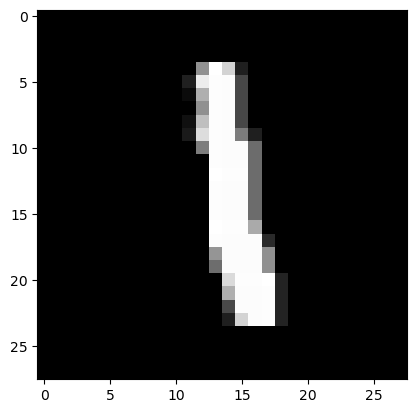

In [202]:
image, label = dataset[6]
plt.imshow(image, cmap='gray')

In [203]:
# image to transform
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.ToTensor()
])

In [204]:
# MNIST dataset 
datasets = MNIST(root='data/',
                 train=True,
                 transform = transform)

# mnist_dataset = MNIST(root='data/', train=True, transform=transform)


In [205]:
img_tensor, label = datasets[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


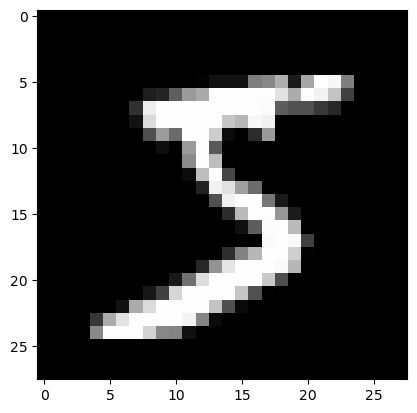

In [206]:
plt.imshow(img_tensor[0], cmap='gray')

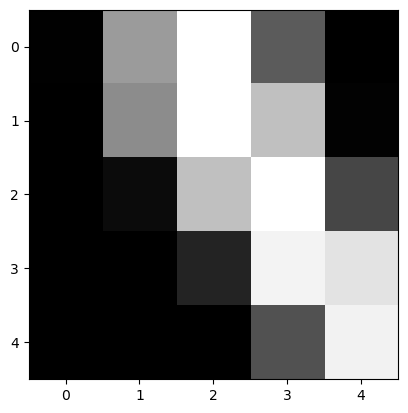

In [207]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [208]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(datasets, [50000, 10000])
len(train_ds),len(val_ds)

# train_ds, val_ds = random_split(mnist_dataset, [50000, 10000])

(50000, 10000)

In [209]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [210]:
len(train_loader), len(val_loader)

(391, 79)

In [211]:
import torch.nn as nn
input_size = 28*28
num_classes = 10

# logistic regression model
model = nn.Linear(input_size, num_classes)

In [212]:
model.weight.shape

torch.Size([10, 784])

In [213]:
model.weight


Parameter containing:
tensor([[-0.0014, -0.0175, -0.0127,  ..., -0.0181, -0.0323, -0.0044],
        [ 0.0211,  0.0023,  0.0165,  ...,  0.0210,  0.0348,  0.0284],
        [ 0.0159,  0.0076, -0.0193,  ...,  0.0088, -0.0354,  0.0270],
        ...,
        [ 0.0187, -0.0061,  0.0053,  ...,  0.0211,  0.0290, -0.0237],
        [ 0.0254, -0.0042, -0.0169,  ..., -0.0187, -0.0168,  0.0262],
        [-0.0234, -0.0253, -0.0267,  ..., -0.0254, -0.0066, -0.0259]],
       requires_grad=True)

In [214]:
model.bias.shape

torch.Size([10])

In [215]:
len(train_loader)

391

In [216]:
# Iterate over the training DataLoader
for images, labels in train_loader:
    print(labels.shape)
    break

torch.Size([128])


In [218]:
# Iterate over the training DataLoader
# for images, labels in train_loader:
#     print(labels.shape)
#     print(images.shape)
#     outputs = model(images)
#     break

In [219]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        print("after",xb.shape)
        out = self.linear(xb)
        return out

In [220]:
model = MnistModel()

In [221]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [222]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0034, -0.0322, -0.0257,  ...,  0.0336,  0.0238, -0.0037],
         [ 0.0324, -0.0285,  0.0059,  ...,  0.0234, -0.0303, -0.0295],
         [-0.0130, -0.0234, -0.0164,  ..., -0.0286, -0.0222,  0.0010],
         ...,
         [-0.0322, -0.0088,  0.0040,  ..., -0.0126, -0.0236, -0.0030],
         [-0.0230, -0.0030, -0.0169,  ...,  0.0102,  0.0232, -0.0317],
         [ 0.0205, -0.0352,  0.0161,  ...,  0.0189, -0.0115,  0.0223]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0285, -0.0060,  0.0249, -0.0334,  0.0124,  0.0184, -0.0125,  0.0046,
         -0.0056, -0.0158], requires_grad=True)]

In [223]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
print("output",outputs.shape)

torch.Size([128, 1, 28, 28])
after torch.Size([128, 784])
output torch.Size([128, 10])


## Softmax

In [224]:
import torch.nn.functional as F

In [225]:
#app;y spftmax for reach output raw
probs = F.softmax(outputs, dim=1)
print(probs[:2])
len(probs)

tensor([[0.0929, 0.1031, 0.0926, 0.1242, 0.1379, 0.0880, 0.0840, 0.0841, 0.0899,
         0.1033],
        [0.0675, 0.0803, 0.0937, 0.1410, 0.1072, 0.1468, 0.0643, 0.1028, 0.1024,
         0.0940]], grad_fn=<SliceBackward0>)


128

In [226]:
torch.sum(probs[10]).item()

1.0000001192092896

In [227]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 5, 3, 8, 3, 3, 9, 3, 3, 8, 3, 3, 2, 3, 3, 3, 3, 1, 5, 3, 3, 3, 9, 3,
        9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 9, 3, 2, 3, 8, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 4, 8, 9, 3, 3, 9, 3, 3, 1, 3, 3, 3, 3, 5, 8, 3, 9, 3,
        3, 3, 7, 1, 3, 3, 3, 8, 3, 3, 1, 3, 4, 3, 3, 4, 3, 3, 3, 3, 5, 1, 9, 3,
        3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 9, 3, 3, 4, 9])
tensor([0.1379, 0.1468, 0.1339, 0.1323, 0.1582, 0.1295, 0.1132, 0.1770, 0.1413,
        0.1245, 0.1728, 0.1466, 0.1225, 0.1454, 0.1390, 0.1319, 0.1613, 0.1444,
        0.1301, 0.1823, 0.1143, 0.1229, 0.1253, 0.1341, 0.1386, 0.1705, 0.1305,
        0.1491, 0.1347, 0.1488, 0.1496, 0.1590, 0.1612, 0.1463, 0.1306, 0.1408,
        0.1305, 0.1454, 0.1391, 0.1312, 0.1239, 0.1235, 0.1585, 0.1436, 0.1525,
        0.1416, 0.1381, 0.1567, 0.1433, 0.1488, 0.1398, 0.1382, 0.1421, 0.1439,
        0.1168, 0.1286, 0.1440, 0.1389, 0.1813, 0.1466, 0.1667, 0.1156, 0.1250,
       

In [228]:
# find accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds ==labels).item()/ len(preds))

In [229]:
accuracy(outputs, labels)

tensor(0.0859)

In [230]:
## loss functions
loss_fn = F.cross_entropy

In [231]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3073, grad_fn=<NllLossBackward0>)


# Training the model

for epoch in range(num_epochs):
    # training phase
    for batch in train_loader:
        # Generate predictions
        # calculate loss
        # compute gradients
        # update weights
        # reset gradients

    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics
    # Calculate average validations loss & metrics

    # Log epoch, loss & metrics for inspection
    


In [232]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_acces = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acces).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc:{:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()


In [233]:
def evaluate(model, val_loader):
    ouputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(ouputs)

In [234]:
def fit(epochs, lr, model, train_laoder, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training phase
        for batch in train_laoder:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [235]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3073034286499023, 'val_acc': 0.04736946150660515}